In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_palette('rainbow',8, 0.45)

In [3]:
# para rodar local
files_path = 'Files'

In [4]:
# para carregar datasets local
rt_movies = pd.read_csv(os.path.join(files_path, "rotten_tomatoes_movies.csv"))
rt_reviews = pd.read_csv(os.path.join(files_path, "rotten_tomatoes_critic_reviews.csv"))

In [2]:
# para carregar dados do Movies dataset do github
url = "https://media.githubusercontent.com/media/BarbaraOlive/tcc_env/main/Files/rotten_tomatoes_movies.csv"
rt_movies = pd.read_csv(url)

In [3]:
# para carregar dados do Reviews dataset do github
url = "https://media.githubusercontent.com/media/BarbaraOlive/tcc_env/main/Files/rotten_tomatoes_critic_reviews.csv"
rt_reviews = pd.read_csv(url)

## Análise Exploratória

### Movies Dataset

In [4]:
rt_movies.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


In [5]:
rt_movies.shape

(17712, 22)

In [6]:
rt_reviews.shape

(1130017, 8)

In [7]:
rt_movies.rotten_tomatoes_link.nunique()

17712

In [8]:
rt_reviews.rotten_tomatoes_link.nunique()

17712

In [9]:
rt_reviews.groupby(["rotten_tomatoes_link"])["review_content"].count().sort_values(ascending=False).head(10)

rotten_tomatoes_link
m/star_wars_the_rise_of_skywalker            992
m/solo_a_star_wars_story                     948
m/star_wars_the_last_jedi                    946
m/rogue_one_a_star_wars_story                892
m/spider_man_far_from_home                   880
m/star_wars_episode_vii_the_force_awakens    874
m/ready_player_one                           866
m/shazam                                     806
m/spider_man_homecoming                      780
m/roma_2018                                  774
Name: review_content, dtype: int64

In [10]:
rt_movies.isnull().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

In [11]:
rt_movies.content_rating.value_counts()

R        6377
NR       5474
PG-13    2979
PG       2168
G         676
NC17       38
Name: content_rating, dtype: int64

In [12]:
rt_movies.tomatometer_status.value_counts()

Rotten             7565
Fresh              6844
Certified-Fresh    3259
Name: tomatometer_status, dtype: int64

<AxesSubplot:ylabel='tomatometer_status'>

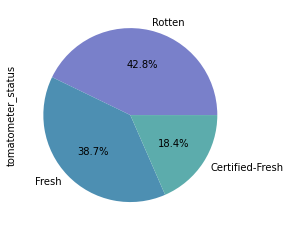

In [13]:
rt_movies.tomatometer_status.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [14]:
rt_movies.genres.value_counts()

Drama                                                                                  1887
Comedy                                                                                 1263
Comedy, Drama                                                                           863
Drama, Mystery & Suspense                                                               731
Art House & International, Drama                                                        589
                                                                                       ... 
Art House & International, Classics, Cult Movies, Horror, Science Fiction & Fantasy       1
Action & Adventure, Cult Movies, Drama, Science Fiction & Fantasy                         1
Art House & International, Documentary, Sports & Fitness                                  1
Action & Adventure, Drama, Mystery & Suspense, Special Interest                           1
Action & Adventure, Drama, Horror, Kids & Family, Mystery & Suspense            

In [12]:
rt_movies['split_genres'] = rt_movies.genres.str.split(',').str[0]

In [16]:
rt_movies.split_genres.value_counts()

Drama                        3789
Comedy                       3725
Action & Adventure           3551
Art House & International    2021
Documentary                  1725
Classics                     1110
Horror                        943
Animation                     379
Mystery & Suspense            289
Kids & Family                  46
Science Fiction & Fantasy      40
Musical & Performing Arts      26
Cult Movies                    22
Romance                        14
Western                         9
Special Interest                3
Television                      1
Name: split_genres, dtype: int64

<AxesSubplot:title={'center':'Distribuição de gêneros dos filmes'}>

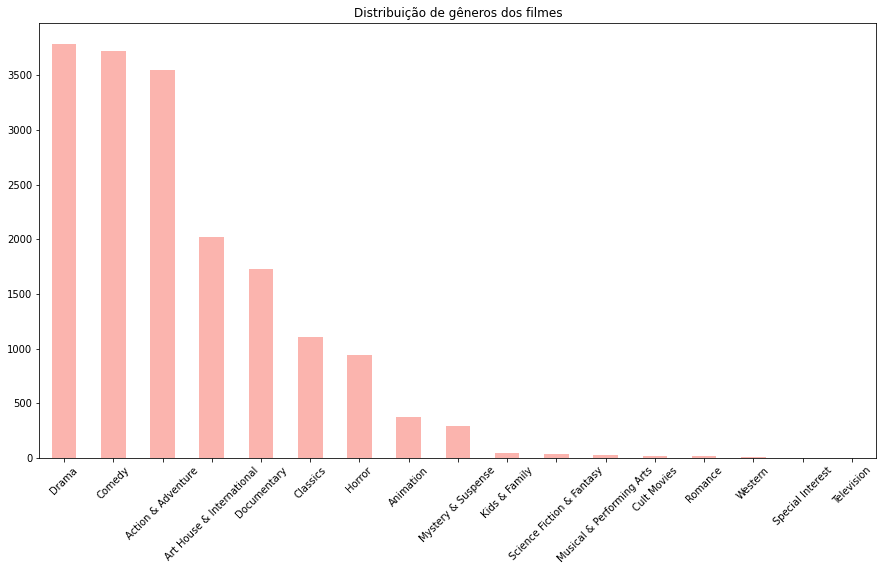

In [17]:
rt_movies.split_genres.value_counts().plot(kind='bar', figsize=(15,8), title='Distribuição de gêneros dos filmes', colormap='Pastel1', rot=45)

In [18]:
rt_movies.tomatometer_rating.value_counts()

100.0    964
50.0     438
88.0     408
67.0     396
83.0     396
        ... 
4.0       46
5.0       41
3.0       21
2.0       11
1.0        6
Name: tomatometer_rating, Length: 101, dtype: int64

<AxesSubplot:>

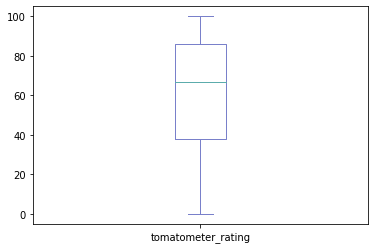

In [19]:
rt_movies.tomatometer_rating.plot(kind='box')

In [20]:
rt_movies.loc[rt_movies.movie_title == 'mother!']

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,split_genres
10619,m/mother_2017,mother!,A young woman spends her days renovating the V...,There's no denying that mother! is the thought...,R,"Drama, Horror, Mystery & Suspense",Darren Aronofsky,Darren Aronofsky,"Jennifer Lawrence, Javier Bardem, Ed Harris, M...",2017-09-15,...,Fresh,68.0,374.0,Spilled,51.0,24931.0,51,256,118,Drama


In [13]:
rt_movies.original_release_date.fillna('2222-02-02', inplace=True)

In [14]:
rt_movies['original_release_date'] = pd.to_datetime(rt_movies['original_release_date'])

In [23]:
max(rt_movies.original_release_date.loc[rt_movies.original_release_date != '2222-02-02'])

Timestamp('2020-09-30 00:00:00')

In [24]:
min(rt_movies.original_release_date)

Timestamp('1914-06-01 00:00:00')

In [15]:
rt_movies['movie_year'] = rt_movies.loc[rt_movies.original_release_date != '2222-02-02', 
                                        'original_release_date'].apply(lambda x: x.year)

C:\Users\barbara.oliveira\Documents\Particular\TCC\tccenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


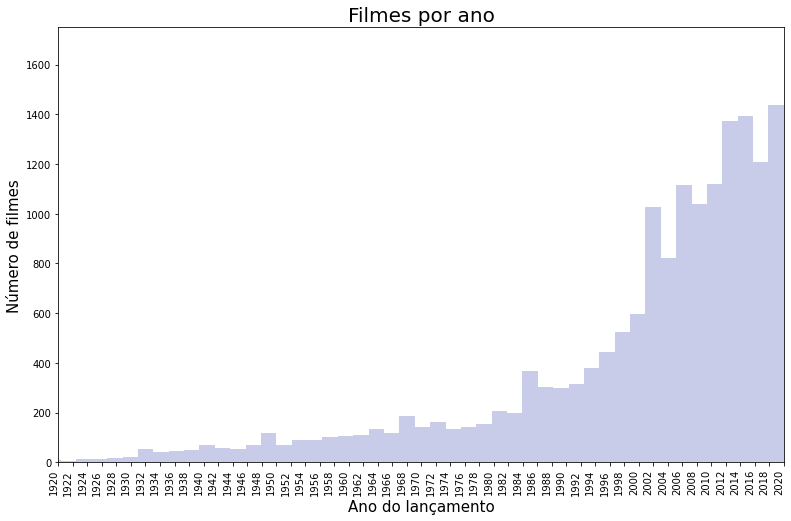

In [26]:
plt.figure(figsize=(13,8))
plt.title('Filmes por ano', size=20)
sns.distplot(rt_movies.movie_year, kde=False)
plt.ylabel('Número de filmes', size=15)
plt.xlabel('Ano do lançamento',size=15)
plt.axis([1920, 2020, 0, 1750])
plt.xticks(np.arange(1920, 2021, step=2),rotation=90, ha='right')
plt.show()

### Reviews dataset

In [27]:
rt_reviews.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [5]:
rt_reviews.isnull().sum()

rotten_tomatoes_link         0
critic_name              18529
top_critic                   0
publisher_name               0
review_type                  0
review_score            305936
review_date                  0
review_content           65806
dtype: int64

In [30]:
rt_reviews.review_type.value_counts()

Fresh     720210
Rotten    409807
Name: review_type, dtype: int64

<AxesSubplot:ylabel='review_type'>

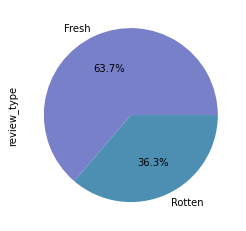

In [31]:
rt_reviews.review_type.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [32]:
rt_reviews.review_score.value_counts()

3/5        90273
4/5        83659
3/4        72366
2/5        60174
2/4        47546
           ...  
69/70          1
2.5/20         1
5.55/10        1
35             1
9.56/10        1
Name: review_score, Length: 814, dtype: int64

In [6]:
rt_reviews['review_date'] = pd.to_datetime(rt_reviews['review_date'])

In [7]:
rt_reviews['review_year'] = rt_reviews['review_date'].apply(lambda x: x.year)

In [8]:
rt_reviews = rt_reviews[rt_reviews.review_content.notnull()]

In [9]:
rt_reviews.review_type.value_counts()

Fresh     681035
Rotten    383176
Name: review_type, dtype: int64

In [17]:
merged = rt_movies.merge(rt_reviews, on="rotten_tomatoes_link", how="inner")

<AxesSubplot:title={'center':'Distribuição de gêneros dos filmes'}, xlabel='split_genres'>

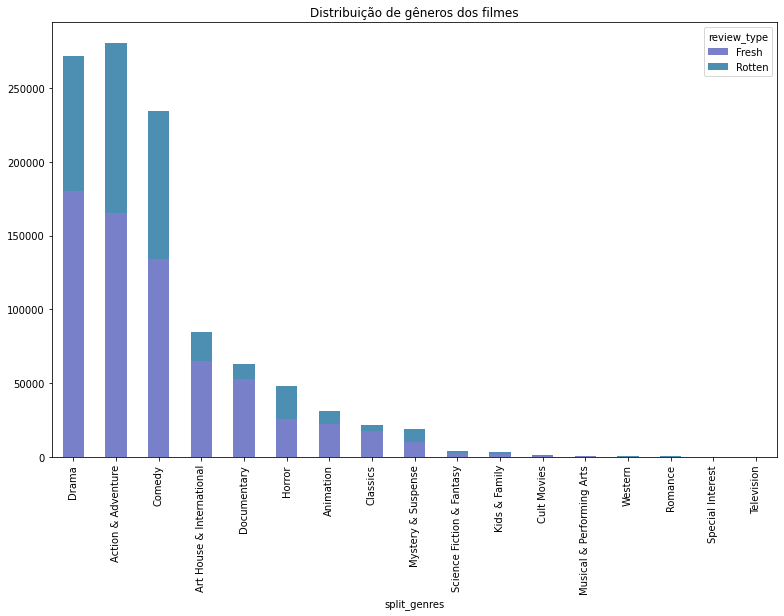

In [18]:
pd.crosstab(merged['split_genres'],merged['review_type']).sort_values(by= "Fresh", ascending=False).plot.bar(figsize=(13,8), title='Distribuição de gêneros dos filmes', stacked=True,  rot=90)

<AxesSubplot:ylabel='review_type'>

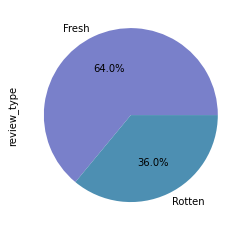

In [19]:
rt_reviews.review_type.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [40]:
rt_reviews.review_year.value_counts().head(25)

2019    81900
2018    76295
2017    60572
2016    57876
2015    55280
2013    53932
2011    51337
2014    51006
2007    50690
2012    50583
2008    48861
2009    48504
2010    47417
2006    47345
2020    45739
2005    43544
2004    42902
2003    42406
2002    42283
2000    41078
2001    24300
1996       28
1998       27
1994       26
1990       24
Name: review_year, dtype: int64

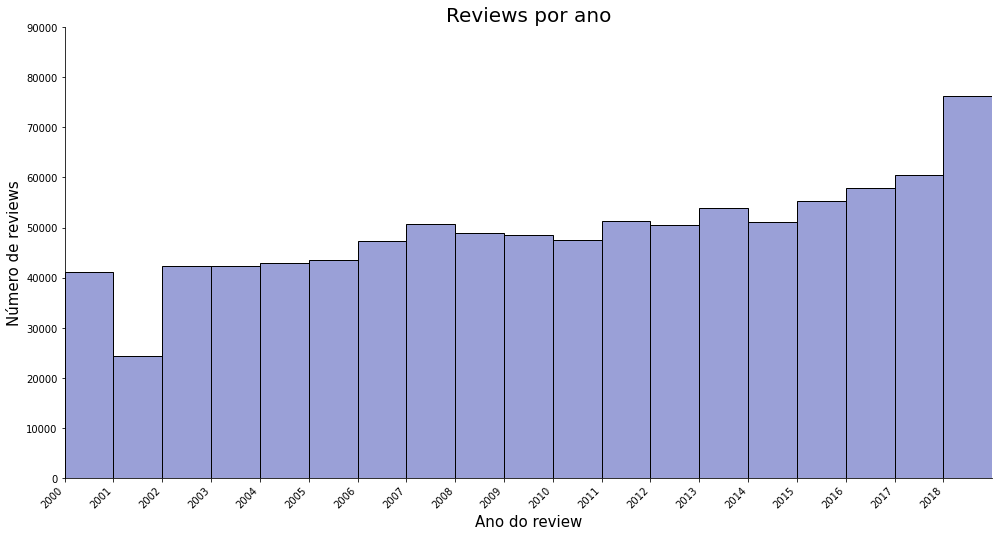

In [24]:
sns.displot(rt_reviews.loc[rt_reviews.review_year >= 2000, 'review_year'], bins=20, height=7, aspect=2)
plt.title('Reviews por ano', size=20)
plt.ylabel('Número de reviews', size=15)
plt.xlabel('Ano do review',size=15)
plt.axis([2000, 2019, 0, 90000])
plt.xticks(np.arange(2000, 2019, step=1),rotation=45, ha='right')
plt.show()


### Salvar arquivos pré-processados

In [43]:
rt_reviews.to_csv(os.path.join(files_path, "rt_reviews.csv"))

In [44]:
rt_movies.to_csv(os.path.join(files_path, "rt_movies.csv"))